## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    # 建立一個有三層隱藏層之神經網路
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model1 = build_mlp()

In [5]:
optimizer = keras.optimizers.Adam(lr=0.001)
optimizer_sgd = keras.optimizers.SGD()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer_sgd)

In [6]:
model.fit(x_train, y_train, epochs=500, batch_size=256, validation_data=(x_test, y_test), shuffle=True)
model1.fit(x_train, y_train, epochs=500, batch_size=256, validation_data=(x_test, y_test), shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/500





50000/50000 [==============================] - 40s 806us/step - loss: 1.9035 - acc: 0.3142 - val_loss: 1.7190 - val_acc: 0.3885
Epoch 2/500
50000/50000 [==============================] - 44s 879us/step - loss: 1.6810 - acc: 0.4012 - val_loss: 1.6829 - val_acc: 0.3990
Epoch 3/500
50000/50000 [==============================] - 38s 754us/step - loss: 1.6063 - acc: 0.4311 - val_loss: 1.5755 - val_acc: 0.4401
Epoch 4/500
50000/50000 [==============================] - 36s 712us/step - loss: 1.5351 - acc: 0.4555 - val_loss: 1.5396 - val_acc: 0.4393
Epoch 5/500
50000/50000 [==============================] - 33s 669us/step - loss: 1.4989 - acc: 0.4649 - val_loss: 1.5012 - val_acc: 0.4694
Epoch 6/500
50000/50000 [==============================] - 35s 706us/step - loss: 1.4685 - acc: 0.4747 - val_loss: 1.4844 - val_acc: 0.4637
Epoch 7/

50000/50000 [==============================] - 35s 700us/step - loss: 0.7329 - acc: 0.7393 - val_loss: 1.6577 - val_acc: 0.5186
Epoch 45/500
50000/50000 [==============================] - 39s 786us/step - loss: 0.7083 - acc: 0.7468 - val_loss: 1.6467 - val_acc: 0.5182
Epoch 46/500
50000/50000 [==============================] - 47s 947us/step - loss: 0.7136 - acc: 0.7453 - val_loss: 1.6346 - val_acc: 0.5330
Epoch 47/500
50000/50000 [==============================] - 37s 738us/step - loss: 0.6920 - acc: 0.7505 - val_loss: 1.6663 - val_acc: 0.5273
Epoch 48/500
50000/50000 [==============================] - 39s 786us/step - loss: 0.6710 - acc: 0.7609 - val_loss: 1.7374 - val_acc: 0.5235
Epoch 49/500
50000/50000 [==============================] - 39s 771us/step - loss: 0.6676 - acc: 0.7620 - val_loss: 1.7133 - val_acc: 0.5199
Epoch 50/500
50000/50000 [==============================] - 37s 736us/step - loss: 0.6479 - acc: 0.7675 - val_loss: 1.7263 - val_acc: 0.5264
Epoch 51/500
50000/50000 [

50000/50000 [==============================] - 19s 382us/step - loss: 0.2839 - acc: 0.8978 - val_loss: 3.1114 - val_acc: 0.5012
Epoch 103/500
50000/50000 [==============================] - 20s 398us/step - loss: 0.2717 - acc: 0.9015 - val_loss: 3.1312 - val_acc: 0.5051
Epoch 104/500
50000/50000 [==============================] - 19s 382us/step - loss: 0.2914 - acc: 0.8938 - val_loss: 3.1024 - val_acc: 0.5007
Epoch 105/500
50000/50000 [==============================] - 20s 401us/step - loss: 0.2922 - acc: 0.8939 - val_loss: 3.1262 - val_acc: 0.5099
Epoch 106/500
50000/50000 [==============================] - 19s 383us/step - loss: 0.2793 - acc: 0.8992 - val_loss: 3.2074 - val_acc: 0.5000
Epoch 107/500
50000/50000 [==============================] - 20s 395us/step - loss: 0.2708 - acc: 0.9031 - val_loss: 3.1428 - val_acc: 0.5012
Epoch 108/500
50000/50000 [==============================] - 19s 384us/step - loss: 0.2531 - acc: 0.9099 - val_loss: 3.1741 - val_acc: 0.5035
Epoch 109/500
50000/

Epoch 160/500
50000/50000 [==============================] - 27s 537us/step - loss: 0.2212 - acc: 0.9203 - val_loss: 3.9853 - val_acc: 0.4990
Epoch 161/500
50000/50000 [==============================] - 24s 480us/step - loss: 0.1865 - acc: 0.9338 - val_loss: 3.9263 - val_acc: 0.4986
Epoch 162/500
50000/50000 [==============================] - 24s 485us/step - loss: 0.1681 - acc: 0.9399 - val_loss: 4.0023 - val_acc: 0.5011
Epoch 163/500
50000/50000 [==============================] - 24s 489us/step - loss: 0.1868 - acc: 0.9327 - val_loss: 4.0852 - val_acc: 0.4953
Epoch 164/500
50000/50000 [==============================] - 25s 506us/step - loss: 0.1801 - acc: 0.9347 - val_loss: 4.0339 - val_acc: 0.5051
Epoch 165/500
50000/50000 [==============================] - 23s 460us/step - loss: 0.1534 - acc: 0.9465 - val_loss: 4.0549 - val_acc: 0.4997
Epoch 166/500
50000/50000 [==============================] - 23s 454us/step - loss: 0.1615 - acc: 0.9426 - val_loss: 4.1566 - val_acc: 0.4962
Epoch 

Epoch 218/500
50000/50000 [==============================] - 14s 275us/step - loss: 0.1483 - acc: 0.9478 - val_loss: 4.5113 - val_acc: 0.4949
Epoch 219/500
50000/50000 [==============================] - 14s 274us/step - loss: 0.1600 - acc: 0.9446 - val_loss: 4.4533 - val_acc: 0.5014
Epoch 220/500
50000/50000 [==============================] - 14s 277us/step - loss: 0.1116 - acc: 0.9602 - val_loss: 4.4603 - val_acc: 0.5002
Epoch 221/500
50000/50000 [==============================] - 14s 271us/step - loss: 0.1238 - acc: 0.9571 - val_loss: 4.5899 - val_acc: 0.4860
Epoch 222/500
50000/50000 [==============================] - 14s 274us/step - loss: 0.1947 - acc: 0.9348 - val_loss: 4.5114 - val_acc: 0.5000
Epoch 223/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.1451 - acc: 0.9491 - val_loss: 4.4718 - val_acc: 0.5038
Epoch 224/500
50000/50000 [==============================] - 14s 277us/step - loss: 0.0743 - acc: 0.9742 - val_loss: 4.5062 - val_acc: 0.5061
Epoch 

Epoch 276/500
50000/50000 [==============================] - 14s 271us/step - loss: 0.1986 - acc: 0.9353 - val_loss: 4.7096 - val_acc: 0.4951
Epoch 277/500
50000/50000 [==============================] - 14s 274us/step - loss: 0.1238 - acc: 0.9582 - val_loss: 4.7138 - val_acc: 0.5017
Epoch 278/500
50000/50000 [==============================] - 14s 274us/step - loss: 0.0915 - acc: 0.9686 - val_loss: 4.7946 - val_acc: 0.5005
Epoch 279/500
50000/50000 [==============================] - 14s 275us/step - loss: 0.1234 - acc: 0.9577 - val_loss: 4.7983 - val_acc: 0.4925
Epoch 280/500
50000/50000 [==============================] - 20234s 405ms/step - loss: 0.0835 - acc: 0.9708 - val_loss: 4.7734 - val_acc: 0.5002
Epoch 281/500
50000/50000 [==============================] - 20s 397us/step - loss: 0.0714 - acc: 0.9760 - val_loss: 4.7903 - val_acc: 0.4955
Epoch 282/500
50000/50000 [==============================] - 21s 414us/step - loss: 0.1595 - acc: 0.9466 - val_loss: 4.7475 - val_acc: 0.5048
Epo

50000/50000 [==============================] - 15s 302us/step - loss: 0.0407 - acc: 0.9868 - val_loss: 4.9400 - val_acc: 0.5031
Epoch 334/500
50000/50000 [==============================] - 15s 301us/step - loss: 0.0765 - acc: 0.9741 - val_loss: 5.0095 - val_acc: 0.4972
Epoch 335/500
50000/50000 [==============================] - 15s 303us/step - loss: 0.2381 - acc: 0.9288 - val_loss: 4.9192 - val_acc: 0.4945
Epoch 336/500
50000/50000 [==============================] - 15s 299us/step - loss: 0.1288 - acc: 0.9577 - val_loss: 4.8983 - val_acc: 0.4930
Epoch 337/500
50000/50000 [==============================] - 15s 303us/step - loss: 0.0570 - acc: 0.9806 - val_loss: 4.9196 - val_acc: 0.4997
Epoch 338/500
50000/50000 [==============================] - 15s 308us/step - loss: 0.0279 - acc: 0.9918 - val_loss: 4.9646 - val_acc: 0.4988
Epoch 339/500
50000/50000 [==============================] - 15s 304us/step - loss: 0.0219 - acc: 0.9935 - val_loss: 4.9760 - val_acc: 0.4999
Epoch 340/500
50000/

Epoch 391/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.1283 - acc: 0.9588 - val_loss: 5.1063 - val_acc: 0.4951
Epoch 392/500
50000/50000 [==============================] - 14s 287us/step - loss: 0.1049 - acc: 0.9653 - val_loss: 5.0877 - val_acc: 0.4955
Epoch 393/500
50000/50000 [==============================] - 14s 277us/step - loss: 0.0580 - acc: 0.9800 - val_loss: 5.1393 - val_acc: 0.4930
Epoch 394/500
50000/50000 [==============================] - 14s 289us/step - loss: 0.1065 - acc: 0.9656 - val_loss: 5.1016 - val_acc: 0.4956
Epoch 395/500
50000/50000 [==============================] - 14s 287us/step - loss: 0.0564 - acc: 0.9811 - val_loss: 5.0868 - val_acc: 0.5013
Epoch 396/500
50000/50000 [==============================] - 14s 286us/step - loss: 0.0626 - acc: 0.9785 - val_loss: 5.1204 - val_acc: 0.5045
Epoch 397/500
50000/50000 [==============================] - 14s 284us/step - loss: 0.1272 - acc: 0.9585 - val_loss: 5.1058 - val_acc: 0.4975
Epoch 

Epoch 449/500
50000/50000 [==============================] - 14s 279us/step - loss: 0.0186 - acc: 0.9947 - val_loss: 5.1281 - val_acc: 0.4995
Epoch 450/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.0171 - acc: 0.9953 - val_loss: 5.1655 - val_acc: 0.5024
Epoch 451/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.0063 - acc: 0.9989 - val_loss: 5.1955 - val_acc: 0.5040
Epoch 452/500
50000/50000 [==============================] - 14s 286us/step - loss: 0.0037 - acc: 0.9996 - val_loss: 5.1968 - val_acc: 0.5070
Epoch 453/500
50000/50000 [==============================] - 14s 289us/step - loss: 0.0030 - acc: 0.9997 - val_loss: 5.2279 - val_acc: 0.5045
Epoch 454/500
50000/50000 [==============================] - 14s 288us/step - loss: 0.0025 - acc: 0.9999 - val_loss: 5.2342 - val_acc: 0.5086
Epoch 455/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.0024 - acc: 0.9998 - val_loss: 5.2657 - val_acc: 0.5079
Epoch 

50000/50000 [==============================] - 12s 247us/step - loss: 1.7157 - acc: 0.3985 - val_loss: 1.7069 - val_acc: 0.3935
Epoch 7/500
50000/50000 [==============================] - 12s 244us/step - loss: 1.6864 - acc: 0.4067 - val_loss: 1.6734 - val_acc: 0.4125
Epoch 8/500
50000/50000 [==============================] - 12s 240us/step - loss: 1.6623 - acc: 0.4178 - val_loss: 1.7208 - val_acc: 0.3951
Epoch 9/500
50000/50000 [==============================] - 12s 245us/step - loss: 1.6472 - acc: 0.4210 - val_loss: 1.7695 - val_acc: 0.3690
Epoch 10/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.6225 - acc: 0.4308 - val_loss: 1.6843 - val_acc: 0.3943
Epoch 11/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.6064 - acc: 0.4364 - val_loss: 1.6259 - val_acc: 0.4283
Epoch 12/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.5870 - acc: 0.4438 - val_loss: 1.6179 - val_acc: 0.4257
Epoch 13/500
50000/50000 [===

50000/50000 [==============================] - 12s 240us/step - loss: 1.1486 - acc: 0.5993 - val_loss: 1.3626 - val_acc: 0.5146
Epoch 65/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.1427 - acc: 0.6026 - val_loss: 1.4073 - val_acc: 0.5029
Epoch 66/500
50000/50000 [==============================] - 13s 253us/step - loss: 1.1366 - acc: 0.6031 - val_loss: 1.4310 - val_acc: 0.4960
Epoch 67/500
50000/50000 [==============================] - 12s 247us/step - loss: 1.1359 - acc: 0.6020 - val_loss: 1.5085 - val_acc: 0.4765
Epoch 68/500
50000/50000 [==============================] - 13s 258us/step - loss: 1.1297 - acc: 0.6059 - val_loss: 1.4111 - val_acc: 0.5010
Epoch 69/500
50000/50000 [==============================] - 16s 318us/step - loss: 1.1200 - acc: 0.6094 - val_loss: 1.4781 - val_acc: 0.4784
Epoch 70/500
50000/50000 [==============================] - 16s 315us/step - loss: 1.1144 - acc: 0.6112 - val_loss: 1.3878 - val_acc: 0.5081
Epoch 71/500
50000/50000 [

50000/50000 [==============================] - 15s 292us/step - loss: 0.8402 - acc: 0.7099 - val_loss: 1.4594 - val_acc: 0.5168
Epoch 123/500
50000/50000 [==============================] - 26s 511us/step - loss: 0.8426 - acc: 0.7085 - val_loss: 1.6354 - val_acc: 0.4806
Epoch 124/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.8323 - acc: 0.7139 - val_loss: 1.3816 - val_acc: 0.5422
Epoch 125/500
50000/50000 [==============================] - 13s 252us/step - loss: 0.8310 - acc: 0.7107 - val_loss: 1.6163 - val_acc: 0.4900
Epoch 126/500
50000/50000 [==============================] - 12s 242us/step - loss: 0.8240 - acc: 0.7147 - val_loss: 1.4732 - val_acc: 0.5177
Epoch 127/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.8127 - acc: 0.7198 - val_loss: 1.6733 - val_acc: 0.4806
Epoch 128/500
50000/50000 [==============================] - 12s 249us/step - loss: 0.8236 - acc: 0.7163 - val_loss: 1.4135 - val_acc: 0.5377
Epoch 129/500
50000/

50000/50000 [==============================] - 14s 283us/step - loss: 0.5762 - acc: 0.8057 - val_loss: 1.7785 - val_acc: 0.5061
Epoch 180/500
50000/50000 [==============================] - 13s 268us/step - loss: 0.5598 - acc: 0.8110 - val_loss: 1.6716 - val_acc: 0.5274
Epoch 181/500
50000/50000 [==============================] - 14s 273us/step - loss: 0.5467 - acc: 0.8151 - val_loss: 1.7260 - val_acc: 0.5153
Epoch 182/500
50000/50000 [==============================] - 13s 267us/step - loss: 0.5747 - acc: 0.8037 - val_loss: 1.8289 - val_acc: 0.4821
Epoch 183/500
50000/50000 [==============================] - 13s 268us/step - loss: 0.5448 - acc: 0.8146 - val_loss: 1.7342 - val_acc: 0.4974
Epoch 184/500
50000/50000 [==============================] - 16s 322us/step - loss: 0.5380 - acc: 0.8200 - val_loss: 2.1155 - val_acc: 0.4542
Epoch 185/500
50000/50000 [==============================] - 14s 271us/step - loss: 0.5441 - acc: 0.8164 - val_loss: 1.6068 - val_acc: 0.5248
Epoch 186/500
50000/

Epoch 237/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.3215 - acc: 0.9010 - val_loss: 1.9014 - val_acc: 0.5296
Epoch 238/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.3270 - acc: 0.8992 - val_loss: 1.8549 - val_acc: 0.5355
Epoch 239/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.3007 - acc: 0.9075 - val_loss: 2.6820 - val_acc: 0.4464
Epoch 240/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.3054 - acc: 0.9085 - val_loss: 1.9324 - val_acc: 0.5271
Epoch 241/500
50000/50000 [==============================] - 13s 253us/step - loss: 0.3536 - acc: 0.8897 - val_loss: 2.0054 - val_acc: 0.5150
Epoch 242/500
50000/50000 [==============================] - 27s 549us/step - loss: 0.2741 - acc: 0.9161 - val_loss: 1.8433 - val_acc: 0.5442
Epoch 243/500
50000/50000 [==============================] - 12s 245us/step - loss: 0.2889 - acc: 0.9111 - val_loss: 1.9600 - val_acc: 0.5204
Epoch 

Epoch 295/500
50000/50000 [==============================] - 13s 259us/step - loss: 0.1585 - acc: 0.9610 - val_loss: 3.5085 - val_acc: 0.4054
Epoch 296/500
50000/50000 [==============================] - 13s 265us/step - loss: 0.1642 - acc: 0.9616 - val_loss: 2.2129 - val_acc: 0.5485
Epoch 297/500
50000/50000 [==============================] - 13s 260us/step - loss: 0.3023 - acc: 0.9238 - val_loss: 2.2366 - val_acc: 0.5027
Epoch 298/500
50000/50000 [==============================] - 14s 275us/step - loss: 0.1227 - acc: 0.9714 - val_loss: 2.2495 - val_acc: 0.5344
Epoch 299/500
50000/50000 [==============================] - 16s 327us/step - loss: 0.0965 - acc: 0.9803 - val_loss: 2.3345 - val_acc: 0.5282
Epoch 300/500
50000/50000 [==============================] - 15s 299us/step - loss: 0.2115 - acc: 0.9477 - val_loss: 2.3543 - val_acc: 0.5197
Epoch 301/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.1461 - acc: 0.9635 - val_loss: 2.2373 - val_acc: 0.5426
Epoch 

Epoch 353/500
50000/50000 [==============================] - 14s 276us/step - loss: 0.0342 - acc: 0.9966 - val_loss: 2.5370 - val_acc: 0.5454
Epoch 354/500
50000/50000 [==============================] - 19s 376us/step - loss: 0.0327 - acc: 0.9971 - val_loss: 2.5865 - val_acc: 0.5400
Epoch 355/500
50000/50000 [==============================] - 13s 266us/step - loss: 0.0308 - acc: 0.9977 - val_loss: 2.5726 - val_acc: 0.5424
Epoch 356/500
50000/50000 [==============================] - 15s 307us/step - loss: 0.0304 - acc: 0.9978 - val_loss: 2.5836 - val_acc: 0.5444
Epoch 357/500
50000/50000 [==============================] - 14s 290us/step - loss: 0.4676 - acc: 0.8930 - val_loss: 2.6515 - val_acc: 0.5175
Epoch 358/500
50000/50000 [==============================] - 16s 311us/step - loss: 0.1715 - acc: 0.9552 - val_loss: 3.7139 - val_acc: 0.3997
Epoch 359/500
50000/50000 [==============================] - 13s 251us/step - loss: 0.1082 - acc: 0.9771 - val_loss: 2.5294 - val_acc: 0.5447
Epoch 

Epoch 411/500
50000/50000 [==============================] - 18s 364us/step - loss: 0.0150 - acc: 0.9996 - val_loss: 2.7794 - val_acc: 0.5411
Epoch 412/500
50000/50000 [==============================] - 16s 317us/step - loss: 0.0146 - acc: 0.9995 - val_loss: 2.8189 - val_acc: 0.5385
Epoch 413/500
50000/50000 [==============================] - 15s 294us/step - loss: 0.0144 - acc: 0.9996 - val_loss: 2.7996 - val_acc: 0.5423
Epoch 414/500
50000/50000 [==============================] - 15s 306us/step - loss: 0.0144 - acc: 0.9996 - val_loss: 2.7941 - val_acc: 0.5442
Epoch 415/500
50000/50000 [==============================] - 15s 309us/step - loss: 0.0140 - acc: 0.9996 - val_loss: 2.7938 - val_acc: 0.5415
Epoch 416/500
50000/50000 [==============================] - 17s 336us/step - loss: 0.0137 - acc: 0.9996 - val_loss: 2.8254 - val_acc: 0.5413
Epoch 417/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.0135 - acc: 0.9996 - val_loss: 2.8200 - val_acc: 0.5416
Epoch 

Epoch 469/500
50000/50000 [==============================] - 16s 324us/step - loss: 0.0075 - acc: 0.9999 - val_loss: 3.0089 - val_acc: 0.5422
Epoch 470/500
50000/50000 [==============================] - 16s 318us/step - loss: 0.0072 - acc: 0.9999 - val_loss: 3.0177 - val_acc: 0.5423
Epoch 471/500
50000/50000 [==============================] - 16s 312us/step - loss: 0.0073 - acc: 0.9999 - val_loss: 3.0170 - val_acc: 0.5428
Epoch 472/500
50000/50000 [==============================] - 15s 307us/step - loss: 0.0071 - acc: 0.9999 - val_loss: 3.0215 - val_acc: 0.5439
Epoch 473/500
50000/50000 [==============================] - 16s 322us/step - loss: 0.0070 - acc: 0.9999 - val_loss: 3.0207 - val_acc: 0.5419
Epoch 474/500
50000/50000 [==============================] - 16s 316us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 3.0271 - val_acc: 0.5405
Epoch 475/500
50000/50000 [==============================] - 15s 298us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 3.0563 - val_acc: 0.5384
Epoch 

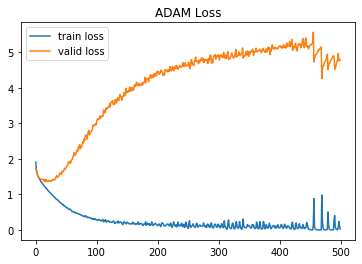

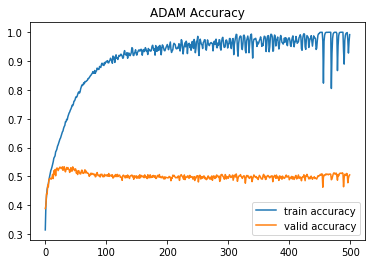

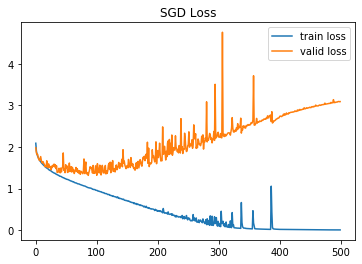

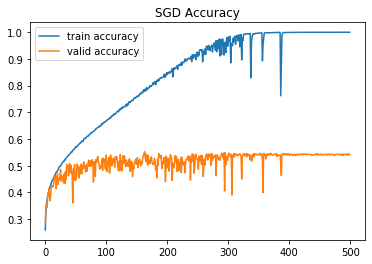

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程
%matplotlib inline
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
train_loss1 = model1.history.history["loss"]
valid_loss1 = model1.history.history["val_loss"]
train_acc1 = model1.history.history["acc"]
valid_acc1 = model1.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("ADAM Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("ADAM Accuracy")
plt.show()

plt.plot(range(len(train_loss1)), train_loss1, label="train loss")
plt.plot(range(len(valid_loss1)), valid_loss1, label="valid loss")
plt.legend()
plt.title("SGD Loss")
plt.show()

plt.plot(range(len(train_acc1)), train_acc1, label="train accuracy")
plt.plot(range(len(valid_acc1)), valid_acc1, label="valid accuracy")
plt.legend()
plt.title("SGD Accuracy")
plt.show()